# Process Mining Analysis of User Interactions using Process Mining

This Notebook analyses an event log with interactions generated in usability tests applied to a geospatial search engine developed at the National Geographic Institute of Spain.


In [52]:
# Install PM4Py: Python library providing a comprehensive array of tools for process mining (https://pm4py.fit.fraunhofer.de/)
#!pip install pm4py

In [53]:
# Import required libraries
import pandas as pd
import pm4py

In [54]:
event_log = pd.read_csv("event_log.csv", sep=";")
event_log["timestamp"]=pd.to_datetime(event_log['timestamp'])
event_log.groupby(['case']).agg({'timestamp': 'max'}).reset_index()
event_log=event_log.merge(event_log.groupby(['case']).agg(duration=('timestamp', 'max')).reset_index(), how='left', on='case')
event_log = pm4py.format_dataframe(event_log, case_id='case', activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))
event_log.head()

Start activities: {'QUICK SEARCH': 21}
End activities: {'Filter': 4, 'ADVANCED SEARCH & RESULTS': 8, 'Point search': 1, 'Geometry search': 2, 'Map exploration': 3, 'METADATA PAGE': 1, 'Text search': 1, 'Download': 1}


,timestamp,activity,case,category,duration,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,2024-01-23 00:00:00+00:00,QUICK SEARCH,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,QUICK SEARCH,2024-01-23 00:00:00+00:00,0,0
1,2024-01-23 00:00:05+00:00,Filter,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,Filter,2024-01-23 00:00:05+00:00,1,0
2,2024-01-23 00:00:45+00:00,Text search,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,Text search,2024-01-23 00:00:45+00:00,2,0
3,2024-01-23 00:01:13+00:00,ADVANCED SEARCH & RESULTS,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,ADVANCED SEARCH & RESULTS,2024-01-23 00:01:13+00:00,3,0
4,2024-01-23 00:02:00+00:00,Filter,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,Filter,2024-01-23 00:02:00+00:00,4,0


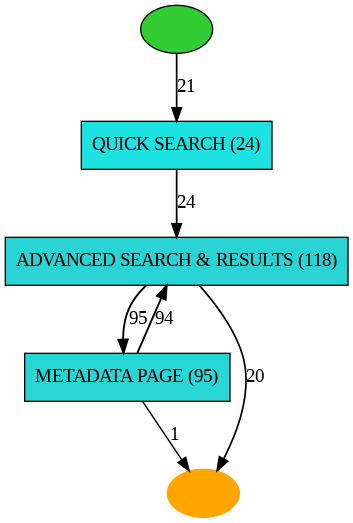

In [63]:
map = pm4py.discover_heuristics_net(event_log[event_log["activity"].isin(["QUICK SEARCH", "ADVANCED SEARCH & RESULTS", "METADATA PAGE"])])
pm4py.view_heuristics_net(map)

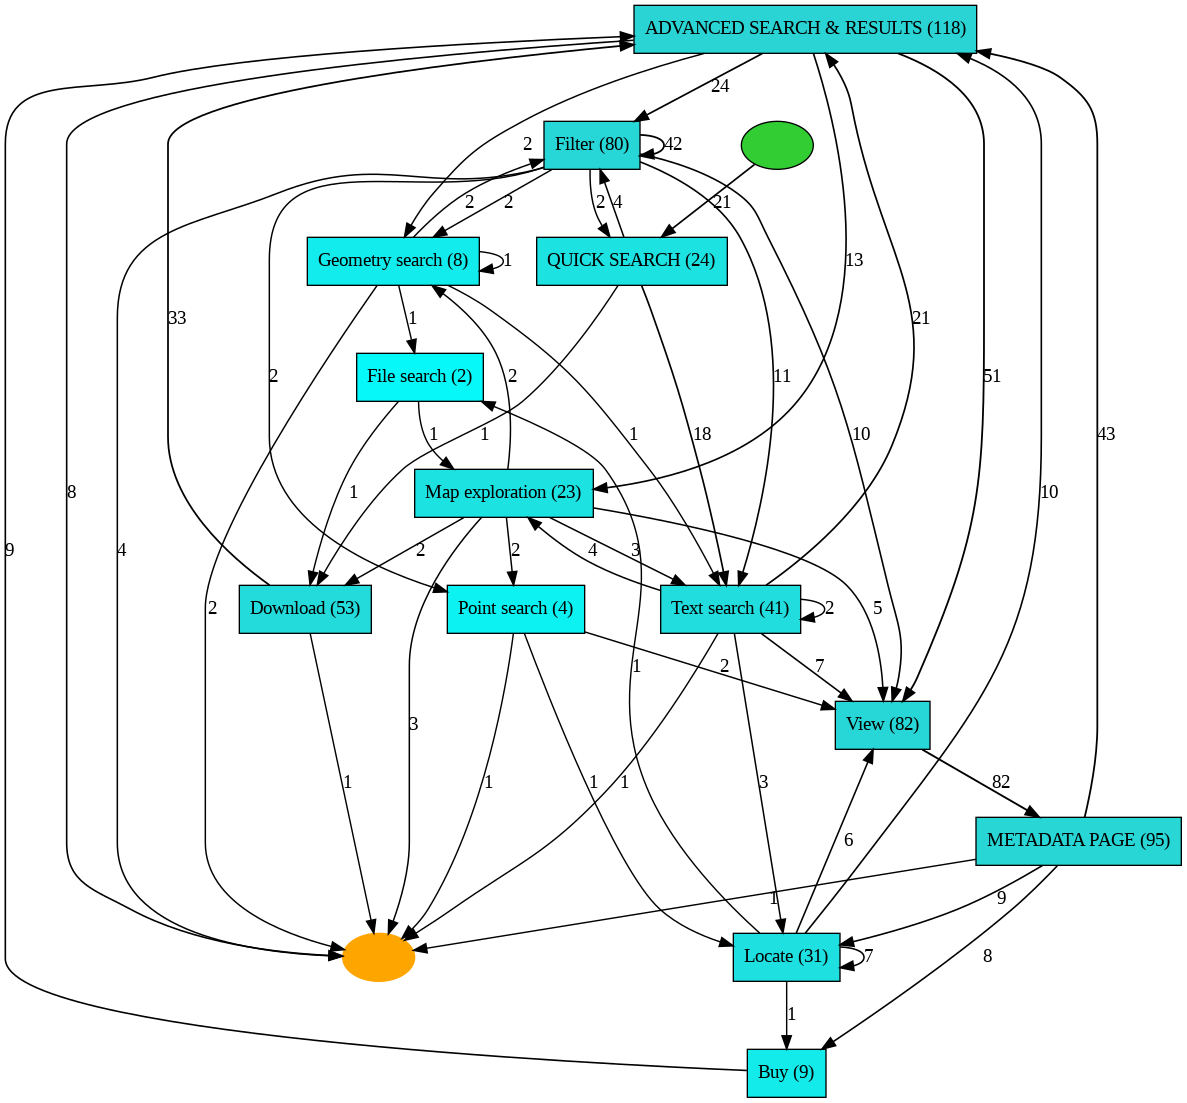

In [55]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

In [56]:
event_log

,timestamp,activity,case,category,duration,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,start_timestamp
0,2024-01-23 00:00:00+00:00,QUICK SEARCH,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,QUICK SEARCH,2024-01-23 00:00:00+00:00,0,0,2024-01-23 00:00:00+00:00
1,2024-01-23 00:00:05+00:00,Filter,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,Filter,2024-01-23 00:00:05+00:00,1,0,2024-01-23 00:00:05+00:00
2,2024-01-23 00:00:45+00:00,Text search,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,Text search,2024-01-23 00:00:45+00:00,2,0,2024-01-23 00:00:45+00:00
3,2024-01-23 00:01:13+00:00,ADVANCED SEARCH & RESULTS,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,ADVANCED SEARCH & RESULTS,2024-01-23 00:01:13+00:00,3,0,2024-01-23 00:01:13+00:00
4,2024-01-23 00:02:00+00:00,Filter,A10,A. Novice users,2024-01-23 00:06:06+00:00,A10,Filter,2024-01-23 00:02:00+00:00,4,0,2024-01-23 00:02:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
565,2024-01-23 00:26:36+00:00,View,C9,C. Expert familiar users,2024-01-23 00:29:41+00:00,C9,View,2024-01-23 00:26:36+00:00,565,20,2024-01-23 00:26:36+00:00
566,2024-01-23 00:26:37+00:00,METADATA PAGE,C9,C. Expert familiar users,2024-01-23 00:29:41+00:00,C9,METADATA PAGE,2024-01-23 00:26:37+00:00,566,20,2024-01-23 00:26:37+00:00
567,2024-01-23 00:27:13+00:00,Locate,C9,C. Expert familiar users,2024-01-23 00:29:41+00:00,C9,Locate,2024-01-23 00:27:13+00:00,567,20,2024-01-23 00:27:13+00:00
568,2024-01-23 00:28:12+00:00,ADVANCED SEARCH & RESULTS,C9,C. Expert familiar users,2024-01-23 00:29:41+00:00,C9,ADVANCED SEARCH & RESULTS,2024-01-23 00:28:12+00:00,568,20,2024-01-23 00:28:12+00:00


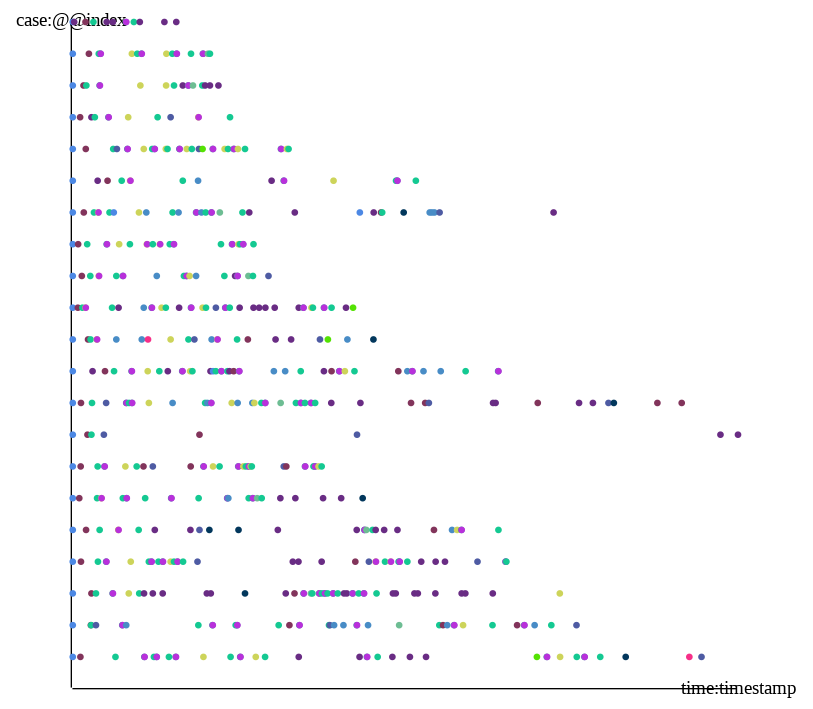

In [60]:
event_log=event_log.sort_values(by=['category','duration'],ascending=False)
pm4py.view_dotted_chart(event_log,show_legend=False)